# The Bloch Sphere

First of all, Import required functions from Qiskit

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, IBMQ, Aer, execute, quantum_info

from math import sqrt, pi

Loading our accoun we get access to the real quantum computers we are entitled to use

In [2]:
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

## The Rules of Measurement <a id="rules-measurement"></a>
### A Very Important Rule <a id="important-rule"></a>

There is a simple rule for measurement. To find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do:

$$p(|x\rangle) = | \langle x| \psi \rangle|^2$$

The symbols $\langle$ and $|$ tell us $\langle x |$ is a row vector and the symbols $|$ and $\rangle$ tell us $|\psi\rangle$ is a column vector. In quantum mechanics we call the column vectors _kets_ and the row vectors _bras._ Together they make up _bra-ket_ notation. Any ket $|a\rangle$ has a corresponding bra $\langle a|$, and we convert between them using the conjugate transpose.
<details>
    <summary>Reminder: Conjugate Transpose (Click here to expand)</summary>
    <p>Conversion between bra-ket takes places using the <i>conjugate transpose</i> method. We know a ket (column vector) is represented as follows:
        $$\quad|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}$$
    </p>
    <p>
In conjugate transpose method, the matrix is transposed and the elements are complex conjugated (represented by the "$*$" operation) where complex conjugate ("$*$") of a complex number is a number with an equal real part and an imaginary part equal in magnitude but opposite in sign. This gives the coressponding bra (row vector) as follows:
        $$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}$$
    </p>
</details>   

<details>
  <summary>Reminder: The Inner Product (Click here to expand)</summary>
    <p>There are different ways to multiply vectors, here we use the <i>inner product</i>. The inner product is a generalisation of the <i>dot product</i> which you may already be familiar with. In this guide, we use the inner product between a bra (row vector) and a ket (column vector), and it follows this rule:
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    </p>
  <p>We can see that the inner product of two vectors always gives us a scalar. A useful thing to remember is that the inner product of two orthogonal vectors is 0, for example if we have the orthogonal vectors $|0\rangle$ and $|1\rangle$:
    $$\langle1|0\rangle = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
  <p>Additionally, remember that the vectors $|0\rangle$ and $|1\rangle$ are also normalised (magnitudes are equal to 1):
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   </p>
</details>

         
In the equation above, $|x\rangle$ can be any qubit state. To find the probability of measuring $|x\rangle$, we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $|q_0\rangle$ from before, we can see the probability of measuring $|0\rangle$ is indeed $0.5$:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle 0| q_0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle + \tfrac{i}{\sqrt{2}}\langle 0|1\rangle \\
& = \tfrac{1}{\sqrt{2}}\cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
& = \tfrac{1}{\sqrt{2}}\\
|\langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

You should verify the probability of measuring $|1\rangle$ as an exercise.

This rule governs how we get information out of quantum states. It is therefore very important for everything we do in quantum computation. It also immediately implies several important facts.

### The Implications of this Rule <a id="implications"></a>
### #1 Normalisation

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Thus if:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Then:

$$ |\alpha|^2 + |\beta|^2 = 1 $$

### #2 Alternative measurement

The measurement rule gives us the probability $p(|x\rangle)$ that a state $|\psi\rangle$ is measured as $|x\rangle$. Nowhere does it tell us that $|x\rangle$ can only be either $|0\rangle$ or $|1\rangle$.

The measurements we have considered so far are in fact only one of an infinite number of possible ways to measure a qubit. For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.

This possibility will be explored more in the next section. For now, just bear in mind that $|x\rangle$ is not limited to being simply $|0\rangle$ or $|1\rangle$.

### #3 Global Phase

We know that measuring the state $|1\rangle$ will give us the output `1` with certainty. But we are also able to write down states such as 

$$\begin{bmatrix}0 \\ i\end{bmatrix} = i|1\rangle.$$

To see how this behaves, we apply the measurement rule.

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Here we find that the factor of $i$ disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state $|x\rangle$. It does not matter what measurement we are considering, the probabilities for the state $i|1\rangle$ are identical to those for $|1\rangle$. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

More generally, we refer to any overall factor $\gamma$ on a state for which $|\gamma|=1$ as a 'global phase'. States that differ only by a global phase are physically indistinguishable.

$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Note that this is distinct from the phase difference _between_ terms in a superposition, which is known as the 'relative phase'. This becomes relevant once we consider different types of measurement and multiple qubits.


### #4 The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

We sometimes refer to this as _collapsing_ the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $|0\rangle$ or $|1\rangle$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit. 



## The Bloch Sphere <a id="bloch-sphere"></a>
### Describing the Restricted Qubit State <a id="bloch-sphere-1"></a>

We saw earlier in this chapter that the general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications in section 2 tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit. 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

### Visually Representing a Qubit State <a id="bloch-sphere-2"></a>

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any single qubit state on the surface of a sphere, known as the _Bloch sphere._


## Important

To represent the state of **individual** qubits, we can use the Bloch Sphere.

Intuitivelly, the arrow is as near to the poles as the **probability** of measuring 1 or 0 respectivelly

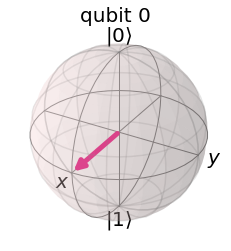

In [4]:
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1)
qc.h(0)
psi = quantum_info.Statevector.from_instruction(qc)

plot_bloch_multivector(psi)

Following the standard physics convention, the x-axis comes out of the page, the y-axis points to the side, and z-axis is oriented up. Then, since the Bloch sphere has radius 1, |0⟩ corresponds to the (x,y,z) point (0,0,1), and |1⟩ corresponds to (0, 0, −1).

## Initialization

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use the `initialize()` method to transform this into any state. We give `initialize()` the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

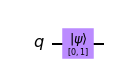

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

We can then use Qiskit to view the resulting state of our qubit.

In [7]:
# **** ADD YOUR CODE HERE ***

# ***************************

<IPython.core.display.Math object>

Lets initialize the qubit in a superposition state:

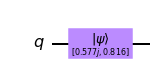

In [8]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
# **** ADD YOUR CODE HERE ***
initial_state =
# ***************************
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

We can then use Qiskit to view the resulting state of our qubit.

In [9]:
# **** ADD YOUR CODE HERE ***

# ***************************

<IPython.core.display.Math object>

So we can plot the Bloch Sphere of the state

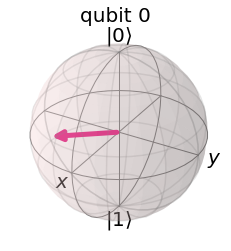

In [10]:
# **** ADD YOUR CODE HERE ***

# ***************************

#### Quick Exercise
1. Create a different state vector that will give the same measurement probabilities ($1/3$ probability of measuring $|0\rangle$).
2. Verify that the probability of measuring $|1\rangle$ for these two states is $2/3$.

In [ ]:
# **** ADD YOUR CODE HERE ***

# ***************************

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table